In [1]:
! gdown https://drive.google.com/u/0/uc?id=17WpSslT1bv81vHy3k1u0lo53_S10evDe

Downloading...
From: https://drive.google.com/u/0/uc?id=17WpSslT1bv81vHy3k1u0lo53_S10evDe
To: /content/CXR_Covid-19_Challenge.zip
3.61GB [00:56, 64.1MB/s]


In [2]:
! unzip -qq CXR_Covid-19_Challenge.zip

In [3]:
# ! gdown https://drive.google.com/u/2/uc?id=1cpqqgbb77-1vt5-SvmQWV2Klla_tuLjD

In [4]:
import glob
import cv2
import matplotlib.pyplot as plt

###########################
EPOCHS = 10
MODEL_NAME = 'VGG_16'
IMG_SIZE = '360x360'
OUTPUT_LAYERS = '128-32-3'
###########################

In [6]:


from tensorflow.keras.utils import to_categorical
from PIL import Image

import pandas as pd
import sys
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
import numpy as np
import glob
import time
import cv2
import os
from tensorflow.keras.utils import to_categorical
from PIL import Image

import tensorflow as tf
from keras.regularizers import l2
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Conv2D, MaxPool2D,\
                                    GlobalMaxPool2D, Dropout, SpatialDropout2D, add, concatenate
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Model
from tensorflow.keras.metrics import AUC, Precision, Recall, SensitivityAtSpecificity, PrecisionAtRecall, \
                                     TruePositives, TrueNegatives, FalsePositives, FalseNegatives


from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow import keras

import pandas as pd

import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
import numpy as np
import glob
import time
import cv2
import os



In [15]:
N_LABELS = 3

from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense, Flatten, GlobalAveragePooling2D


# Change the pretrained model name according to the given criteria

frozen = VGG16 (weights="imagenet", input_shape=(360,360,3), include_top=False)
frozen.summary()

trainable = frozen.output
trainable = GlobalAveragePooling2D()(trainable)
#print(trainable.shape)
trainable = Dense(128, activation="relu")(trainable)
trainable = Dense(32, activation="relu")(trainable)
trainable = Dense(N_LABELS, activation="softmax")(trainable)
model = Model(inputs=frozen.input, outputs=trainable)
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 360, 360, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 360, 360, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 360, 360, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 180, 180, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 180, 180, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 180, 180, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 90, 90, 128)       0     

In [16]:
# https://stackoverflow.com/questions/55640149/error-in-keras-when-i-want-to-calculate-the-sensitivity-and-specificity
# add specificity and sensitivity here
# https://datascience.stackexchange.com/questions/33587/keras-custom-loss-function-as-true-negatives-by-true-negatives-plus-false-posit/40746#40746
# add some loss functions here

# Metrics
# https://www.sabinasz.net/unbalanced-classes-machine-learning/

from keras import backend as K

def sensitivity(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    return true_positives / (possible_positives + K.epsilon())

def specificity(y_true, y_pred):
    true_negatives = K.sum(K.round(K.clip((1-y_true) * (1-y_pred), 0, 1)))
    possible_negatives = K.sum(K.round(K.clip(1-y_true, 0, 1)))
    return true_negatives / (possible_negatives + K.epsilon())



opt = Adam(learning_rate=1e-4)
model.compile(optimizer=opt, loss='categorical_crossentropy',
            experimental_run_tf_function=False,
            metrics = ['accuracy', sensitivity, specificity]
            )



In [9]:
# ! gdown https://drive.google.com/u/2/uc?id=1Ma8-7fG8-CneFcR0qBJ2aXNakKXyujqS
! gdown https://drive.google.com/u/0/uc?id=1_fWrH3qvkYhA8Y0j7DRMEf_xroE8WJBh

Downloading...
From: https://drive.google.com/u/0/uc?id=1_fWrH3qvkYhA8Y0j7DRMEf_xroE8WJBh
To: /content/CXR_Covid-19_100e_VGG_16_360x360_128-32-3.h5
178MB [00:02, 84.6MB/s]


In [17]:

from tensorflow import keras
model = keras.models.load_model('CXR_Covid-19_100e_VGG_16_360x360_128-32-3.h5', custom_objects={'specificity': specificity, 'sensitivity': sensitivity})

In [18]:
layer_names = []
filter_depth = []
for layer in model.layers:
  if 'conv' not in layer.name:
    continue
  filters, biases = layer.get_weights()
  print(layer.name, filters.shape)
  layer_names.append(layer.name)
  filter_depth.append(filters.shape[3])

block1_conv1 (3, 3, 3, 64)
block1_conv2 (3, 3, 64, 64)
block2_conv1 (3, 3, 64, 128)
block2_conv2 (3, 3, 128, 128)
block3_conv1 (3, 3, 128, 256)
block3_conv2 (3, 3, 256, 256)
block3_conv3 (3, 3, 256, 256)
block4_conv1 (3, 3, 256, 512)
block4_conv2 (3, 3, 512, 512)
block4_conv3 (3, 3, 512, 512)
block5_conv1 (3, 3, 512, 512)
block5_conv2 (3, 3, 512, 512)
block5_conv3 (3, 3, 512, 512)


In [19]:
# https://www.kaggle.com/anktplwl91/visualizing-what-your-convnet-learns

# The purpose of this function is to just convert a numpy array to a standard image format, so that it can be displayed and viewed comfortably
def deprocess_image(x):
    
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1
    x += 0.5
    x = np.clip(x, 0, 1)
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')

    return x

In [20]:
# This function is used to create a loss function that maximizes the value of a given filter in a convolution layer, and then we use SGD to adjust the values of the
# input image so as to maximize this activation value. We pass the layer name and the filter index to the function as arguments. 'loss' is the mean for that particular
# filter, 'grads' is the gradient calculated for this loss with respect to input image. Finally, SGD is run for 80 iterations which continuously maximizes the response
# to input image by adding the gradient. Finally, it uses 'deprocess_image' to convert this array to a representable image format.

def generate_pattern(layer_name, filter_index, size=150):
    
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:, :, :, filter_index])
    grads = K.gradients(loss, model.input)[0]
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
    iterate = K.function([model.input], [loss, grads])
    input_img_data = np.random.random((1, size, size, 3)) * 20 + 128.
    step = 1.
    for i in range(80):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
        
    img = input_img_data[0]
    return deprocess_image(img)


block5_conv3


100%|██████████| 512/512 [46:19<00:00,  5.43s/it]


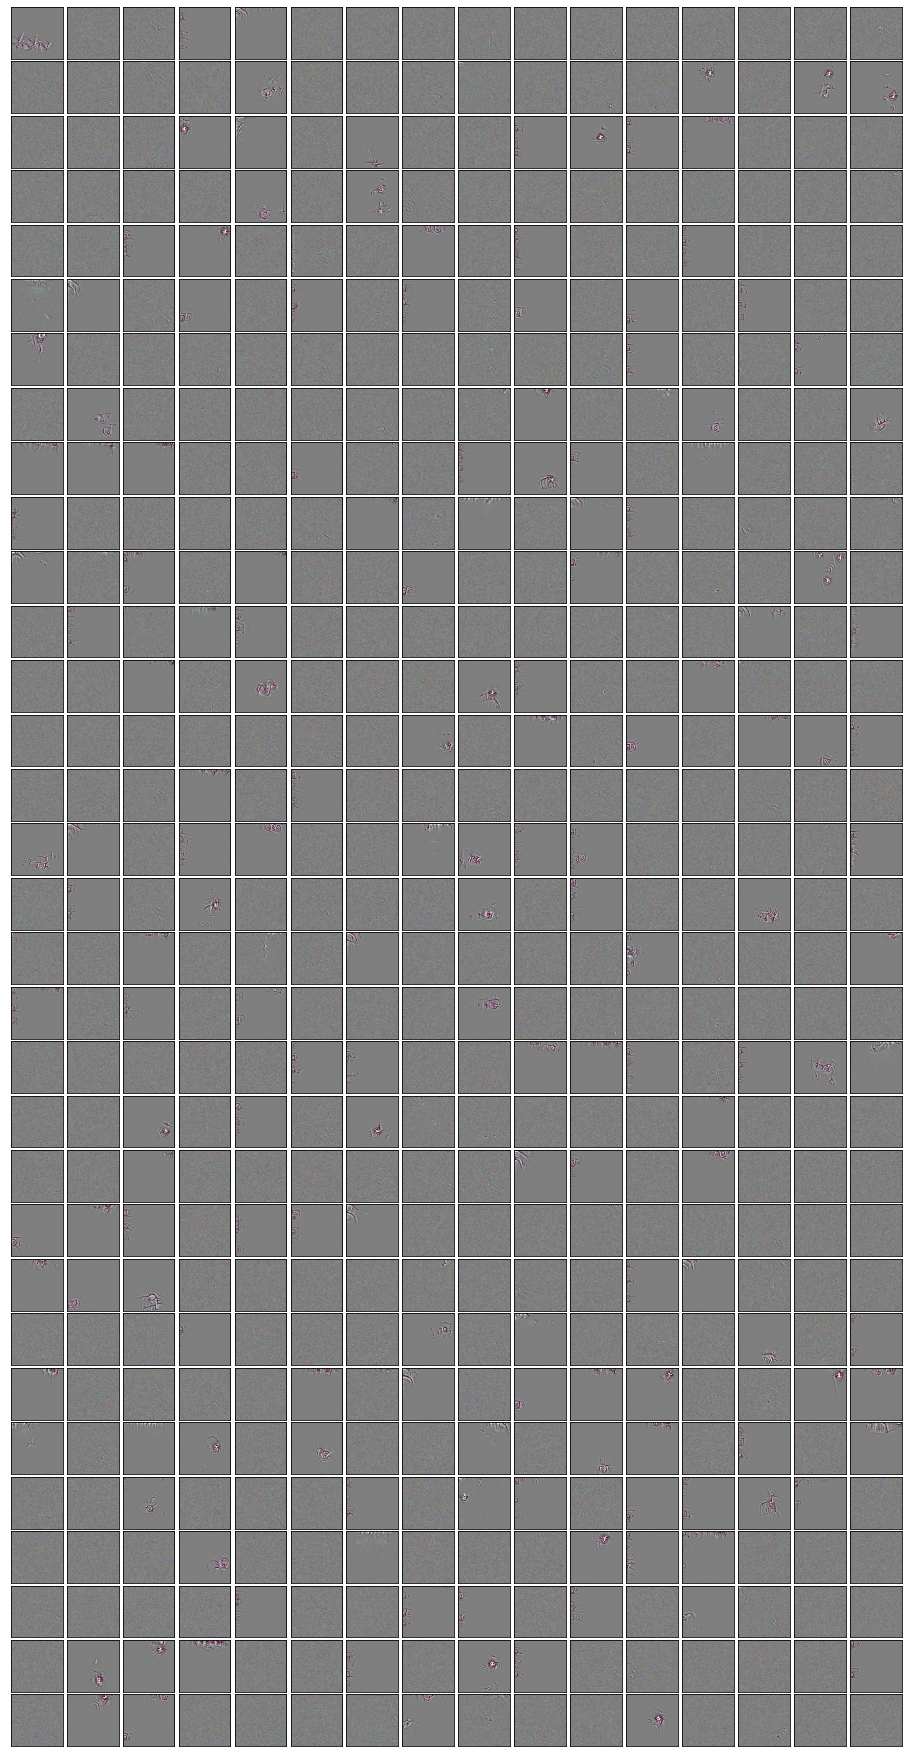

In [22]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
from tqdm import tqdm
import matplotlib.pyplot as plt
import keras.backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Input, Dense, Dropout
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input, decode_predictions

%matplotlib inline

from tensorflow.python.framework.ops import disable_eager_execution
disable_eager_execution()

# Below are the patterns to which the filters from first convolution layer get activated. As we can see these are very basic cross-sectional patterns formed by
# horizontal and vertical lines, which is what the these filters look in the input image and get activated if they find one.

c = 0
for ln, fd in zip(layer_names,filter_depth):
  
  c += 1
  if c<13:
      continue
  print(ln)
  size = int(fd/16)
  fig = plt.figure(figsize=(16, size))
  for img in tqdm(range(fd)):
      ax = fig.add_subplot(size, 16, img+1)
      ax = plt.imshow(generate_pattern(ln, img))
      plt.xticks([])
      plt.yticks([])
      fig.subplots_adjust(wspace=0.05, hspace=0.05)
  plt.savefig(str(ln+".png"),bbox_inches='tight',pad_inches=0,dpi=300)
